In [1]:
%pylab inline
import pynbody 

Populating the interactive namespace from numpy and matplotlib


Tengo un delta de corte de Kitayama 1996 segun esta relacion 

In [45]:
def delta(z,om,ol):
    f=(om*(1+z)**3)/((om*(1+z)**3)+ol)
    d=6*(np.pi**2) * (1.+0.4093*(((1./f) - 1.)**(0.9052)))-1
    
    d2=((3*(12*np.pi)**(2./3.))/20.)*(1.+0.123*np.log10(f))
    
    return d

In [42]:
6*(np.pi**2)

59.21762640653615

In [41]:
delta(0,om,ol)

(1.5704947086729877, 116.24289900995882)

In [31]:
s.properties


{'omegaM0': 0.276,
 'omegaL0': 0.724,
 'boxsize': Unit("8.90e+01 Mpc a h**-1"),
 'a': 1.0,
 'h': 0.703,
 'time': Unit("9.87e-03 s Mpc a**1/2 km**-1 h**-1")}

In [48]:
path='/mnt/is0/fstasys/512_b/out/snapdir_030/'
s=pynbody.load(path+'snapshot_030')
a=s.properties['a']
om=s.properties['omegaM0']
ol=s.properties['omegaL0']

redshift=1./a -1
print(redshift)

2.314454022424439


In [49]:
gas = s.gas
pos = gas['pos']
u   = gas['u']
ne  = gas['ne']
rho = gas['rho']
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu=(1.0-yHe)/(1+yHe+ne)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
te=(5./3.-1.)*u*vv*mu*mp/kcgs

In [50]:
cut=np.arange(0,len(u),1000)
len(cut)

129768

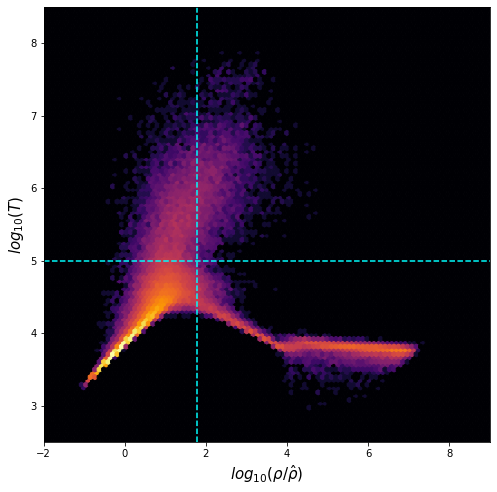

In [51]:
plt.figure(figsize=(8,8))
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)
plt.hexbin(np.log10(rho[cut]/dgs),np.log10(te[cut]),extent=(-2,9,2.5,8.5),bins='log',cmap='inferno')
plt.xlabel('$log_{10}(\\rho / \hat{\\rho})$',size=15)
plt.ylabel('$log_{10}(T)$',size=15)
plt.vlines(x=np.log10(delta(redshift,om,ol)+1),ymin=2.5,ymax=8.5,color='cyan',ls='--')
plt.hlines(y=5,xmin=-2,xmax=9,color='cyan',ls='--')
#plt.title(d3)
plt.savefig(fname='/home/arodriguez/Void-s-Gastrophysics/SeleccionGraficos/DF.png',format='png')